# Research Summary for August 1st, 2023

By Bora Basyildiz 

## Imports

In [1]:
import numpy as np
from numpy import array,zeros,kron,concatenate,kron,ones,sqrt,diag,matmul,pi
from scipy.linalg import expm
from SumHelpFunc import *
import pandas as pd
from SumHelpFunc import *

## Results from Cross Talk Time Dependence Modeling

### ODE Solver

Here we will take a look at using the Runge-Kutta Fourth order method to model the time dependence in our model with cross-talk. We will test difference step sizes with a qubit-to-qubit staggering of 15 in units of the couplings strength.

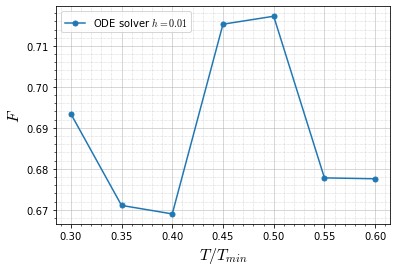

In [43]:
ODE001 = readData("../Data/Closed_System/XX/Fidelities/Qubit_CNOT_XX_M16_all_g1.0_maxT1.0_maxD20_CTode0.01_stag15.0.csv")
ODE001 = ODE001.reset_index().drop('index',axis=1).drop(index=[0])

genPlot(ODE001,l=["ODE solver $h=0.01$"])
saveFig("0801","ODE001")

## Modeling Leakage in a Qutrit Optimziation 

Here we will model the leakage of a Qutrit Optimziation into the higher energy $|3\rangle$ state. We will model this for low, moderate, and high anharmonicity $\delta = 0.1,5,100$

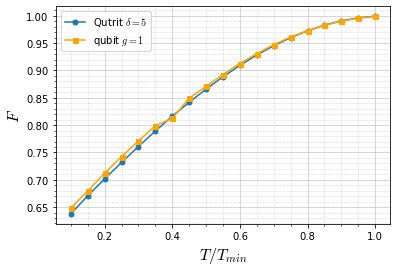

In [17]:
QutritL5 = pd.read_csv("../Data/Leakage/XX/Fidelities/Qutrit_CNOT_XX_M16_leakage5_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
QutritL5.sort_values(by=["time"],inplace=True)
QutritL5 = QutritL5.reset_index().drop('index',axis=1).drop(index=[0])

Qubit = readData("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_all_g1.0_maxT1.0.csv")
Qubit = Qubit.reset_index().drop('index',axis=1).drop(index=[0])

genPlot(QutritL5)
genPlot(Qubit,l=["Qutrit $\delta=5$","qubit $g=1$"],c="orange",m='s')
saveFig("0801","QTL5")

with a fidelity at the speed limit being

In [28]:
print(QutritL5[QutritL5["time"] == 1]["fidelity"].values[0])

0.9992155597428793


Increasing the anharmonicity to 100, we have

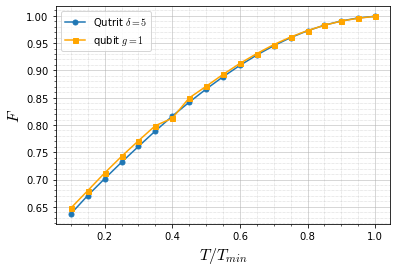

In [29]:
QutritL100 = readData("../Data/Leakage/XX/Fidelities/Qutrit_CNOT_XX_M16_leakage100_g1.0_maxT1.0_maxD20.csv")
QutritL100 = QutritL100.reset_index().drop('index',axis=1).drop(index=[0])

genPlot(QutritL100)
genPlot(Qubit,l=["Qutrit $\delta=5$","qubit $g=1$"],c="orange",m='s')

## Achieving $\geq 99.99\%$ Fidelity for Qubit Leakage Modeling

Here we will extend our total time for our Qubit Leakage Modeling to achieve four nines. 

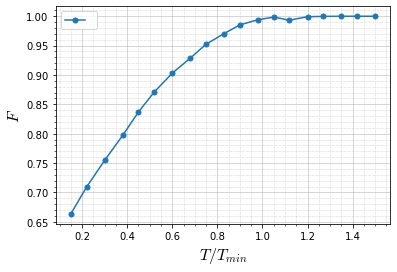

In [38]:
Qubit15 = readData("../Data/Leakage/XX/Fidelities/Qubit_CNOT_XX_M16_leakage5_g1.0_maxT1.5_maxD20.csv")
Qubit15 = Qubit15.reset_index().drop('index',axis=1).drop(index=[0])

genPlot(Qubit15)
saveFig("0801","QL15")

In [37]:
minTime = Qubit15[Qubit15["fidelity"] >= 0.9999]["time"].min()
print("The minimum time to achieve greater than 99.99% fidelity is 1.35 tiems the speed limit")

The minimum time to achieve greater than 99.99% fidelity is 1.35 tiems the speed limit


## Occupancy of higher energy states over time 

Here we will visualize the occupancy of higher energy states over time. Occupancy will be defined similarly to Ashhab's paper, where we will project our gate into the qubit subspace $\{|00\rangle,|01\rangle,|10\rangle,|11\rangle\}$, and will do the same for higher energy subspaces, where the probability is having at least one qudit in a higher energy state. Note that we may not be able to decompose our two qudits, as they may be entangled. We will be taking a look at the following system. 

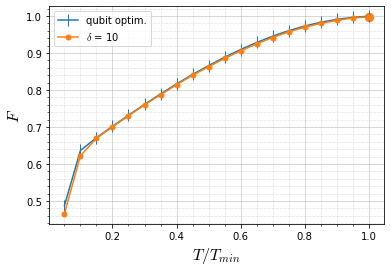

In [4]:
leaky10 = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_leakage10_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
leaky10.sort_values(by=["time"],inplace=True)

qubit = pd.read_csv("../Data/XX/Fidelities/Qubit_CNOT_XX_M16_all_g1.0_maxT1.0_maxD20.csv",names=["fidelity","time"])
qubit.sort_values(by=["time"],inplace=True)

genPlot(qubit,["qubit optim."],"|",12)
genPlot(leaky10,["qubit optim.","$\delta$ = 10"],c="#ff7f0e")
plt.scatter(1,leaky10[leaky10["time"] == 1]["fidelity"], color='#ff7f0e', marker='o', s=70)
#plt.savefig(os.path.join(os.getcwd(),mainDir,"Leakage10.pdf"), format="pdf")
saveFig("0801","SubspaceAnalysis")

Now let's look at the population of higher energy states during our protocol. To do this, we will look at the values $$P_{qb} = \sqrt{\langle\psi|U_m|\psi\rangle}$$

where $P_{qb}$ is the probabilty of being the qubit subspace. The probability of being in the higher energy state is $$P_{qt} = 1 - P_{qb}$$. Now looking at our generated pulse segments, we have

In [5]:
Weights = pd.read_csv("../Data/XX/Weights/Qubit_CNOT_XX_M16_leakage10_g1.0_maxT1.0_maxD20_Weights/Qubit_CNOT_XX_M16_leakage10_g1.0_maxT1.0_maxD20_Wt1.0.csv",names=["X1","X2","Y1","Y2"])

In [6]:
pd.read_csv("../Data/XX/Weights/Qubit_CNOT_XX_M16_leakage10_g1.0_maxT1.0_maxD20_Weights/Qubit_CNOT_XX_M16_leakage10_g1.0_maxT1.0_maxD20_Wt1.0.csv",names=["X1","X2","Y1","Y2"]).to_numpy()

array([[ 4.75862258,  7.24808574,  5.61353892,  4.65338826],
       [ 5.13991822,  1.53511908,  4.82447708,  1.53675661],
       [ 2.05708217, -0.0444211 ,  4.59858771,  1.58431456],
       [ 1.87672162, -1.12088533,  4.77961829,  4.74225108],
       [ 3.15896619, -0.69254136,  4.71125524,  1.57983387],
       [ 8.81450316,  1.58031501,  1.58555181,  7.82962782],
       [ 1.78421924,  1.53817917,  1.59648299,  1.5713749 ],
       [ 4.88223818,  1.58327664,  4.71183118,  1.56207989],
       [ 5.11209841,  1.65230343,  1.59320627,  4.71925997],
       [ 0.82285768, -1.68929674,  4.7001286 ,  1.56702288],
       [ 0.34572757,  4.60536627,  1.58598807,  1.57243666],
       [ 6.37268771, -1.62749906,  1.55607788,  4.7061947 ],
       [ 5.22275042,  1.56701798,  4.71899804,  4.70528924],
       [ 1.27961127,  1.55549321,  1.52853512, -1.56414607],
       [-0.80828765,  4.67245874,  1.56910518,  4.70928825],
       [ 4.80811301,  1.57772195,  3.80440483,  1.56640783]])

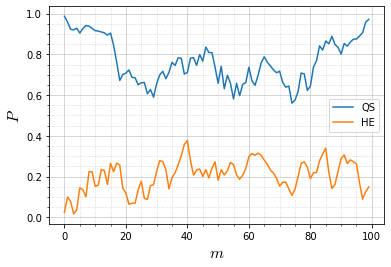

In [4]:
# Generating time evolution and optimizing 
from scipy.linalg import expm
def stateProj(eLevel,maxLevel,output=False):
    psi = ones(maxLevel+1)
    psi[eLevel] = 2
    psi = kron(psi,psi)
    psi = (psi != 1).astype(int)
    for i in range(len(psi)): # This is to ensure no population of higher energy states
        if i > eLevel*(maxLevel+1) + eLevel: psi[i] = 0
    psi = psi/sqrt(sum(psi))
    if output == True:
        for i in range(maxLevel+1):
            for j in range(maxLevel+1):
                print("|" + str(i) + str(j) + ">: " + str(psi[(maxLevel+1)*i + j]))
    return psi

def qbSub(maxLevel):
    psi = 1/2*concatenate((array([1,1]),array((maxLevel-1)*[0]),array([1,1])))
    psiTemp = zeros((maxLevel + 1) ** 2)
    psiTemp[:len(psi)] = psi
    return psiTemp

M = 100
N = 2
Weights = pd.read_csv("../Data/Leakage/XX/Weights/Qubit_CNOT_XX_M100_leakage10_g1.0_maxT1.0_maxD20_Weights/Qubit_CNOT_XX_M100_leakage10_g1.0_maxT1.0_maxD20_Wt1.0.csv",names=["X1","X2","Y1","Y2"])
R = Weights.to_numpy()
level = 3
maxDStr = 20
#Sums Pauli gates with coefficients 
id = array([[1,0,0],[0,1,0],[0,0,1]],dtype=complex)
def sum_pauli(coef, gate):
    total_pauli = zeros([level ** N, level ** N])
    for i in range(0,N):
        pauli_temp = 1
        for j in range(0,i):
            pauli_temp = np.kron(pauli_temp,id)
        pauli_temp = np.kron(pauli_temp,gate)
        for j in range(i+1,N):
            pauli_temp = np.kron(pauli_temp,id)
        total_pauli = total_pauli + maxDStr*np.cos(coef[i])*pauli_temp
    return total_pauli

#Normal Drives
sx = array([[0,1,0],[1,0,0],[0,0,0]],dtype=complex)
sy = array([[0,-1j,0],[1j,0,0],[0,0,0]],dtype=complex)
id = array([[1,0,0],[0,1,0],[0,0,1]],dtype=complex)
drives = [sx,sy]

#Leakage Drives
lx = array([[0,0,0],[0,0,1],[0,1,0]],dtype=complex)
ly = array([[0,0,0],[0,0,-1j],[0,1j,0]],dtype=complex)
quditDrives = [lx,ly]

#Anharmonicity
anharm = 10*array([[0,0,0],[0,0,0],[0,0,1]])

U_Exp = 1
tmin = pi/4
H0 = kron(sx,sx)

qbSpc = []
eSpc = []
l = level-1
psiQB = qbSub(l)
psiHE = stateProj(l,l,False)

for i in range(0,N):
    U_Exp = kron(U_Exp,id)#initializing unitary
for m in range(0,M):#Product of pulses
    pulse_coef = R[m]
    H1 = 0
    for i,d in enumerate(drives):
        H1 = H1 + sum_pauli(pulse_coef[i*N:(i+1)*N],d)
        H1 = H1 + sum_pauli(pulse_coef[i*N:(i+1)*N],quditDrives[i]) 
    H1 = H1 + sum_pauli([1]*N,anharm)
    U_Exp = matmul(expm(-1j*(H0+H1)*tmin/M),U_Exp)
    
    qbSpc.append(np.sqrt(abs( psiQB.T @ U_Exp @ psiQB)))
    eSpc.append(abs( psiHE.T @ U_Exp @ psiQB))

plt.rcParams["mathtext.fontset"] = 'cm' #Allows matplotlib plots to have latex eqs/symbols
plt.plot(qbSpc)
plt.plot(eSpc)
plt.xlabel('$m$',fontsize=16)
plt.ylabel('$P$',fontsize=16)
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
plt.minorticks_on()
plt.legend(["QS","HE"])
saveFig("0801","HE_StatePop")

In [68]:
def stateProj(eLevel,maxLevel,output=False):
    psi = ones(maxLevel+1)
    psi[eLevel] = 2
    psi = kron(psi,psi)
    psi = (psi != 1).astype(int)
    for i in range(len(psi)): # This is to ensure no population of higher energy states
        if i > eLevel*(maxLevel+1) + eLevel: psi[i] = 0
    psi = psi/sqrt(sum(psi))
    if output == True:
        for i in range(maxLevel+1):
            for j in range(maxLevel+1):
                print("|" + str(i) + str(j) + ">: " + str(psi[(maxLevel+1)*i + j]))
    return psi

def qbSub(maxLevel):
    psi = 1/2*concatenate((array([1,1]),array((maxLevel-1)*[0]),array([1,1])))
    psiTemp = zeros((maxLevel + 1) ** 2)
    psiTemp[:len(psi)] = psi
    return psiTemp

def eStateOccup(M,N,level,maxDStr,tmin,R,aVal):
    #Sums Pauli gates with coefficients 
    id = np.eye(level)
    def sum_pauli(coef, gate):
        total_pauli = zeros([level ** N, level ** N])
        for i in range(0,N):
            pauli_temp = 1
            for j in range(0,i):
                pauli_temp = np.kron(pauli_temp,id)
            pauli_temp = np.kron(pauli_temp,gate)
            for j in range(i+1,N):
                pauli_temp = np.kron(pauli_temp,id)
            total_pauli = total_pauli + maxDStr*np.cos(coef[i])*pauli_temp
        return total_pauli

    drives = []
    quditDrives = []

    for l in range(1,level): #something is wrong here
        if l == level - 1:
            drives.append(genDrive(level,l,"x"))
            drives.append(genDrive(level,l,"y"))
        else:
            quditDrives.append(genDrive(level,l,"x"))
            quditDrives.append(genDrive(level,l,"y"))

    #Anharmonicity
    anharmVals = array([aVal*(i+1) for i in range(level-2)])
    anharm = zeros((level,level))
    for l in range(2,level):
        anharm[-1*(l-1),-1*(l-1)] = anharmVals[::-1][l-2]

    U_Exp = 1
    H0 = kron(genDrive(level,1,"x"),genDrive(level,1,"x"))


    occArr = zeros((level - 1, M))
    qbSpc = []
    eSpc = []
    l = level-1
    psiQB = qbSub(l)
    psiHE = stateProj(l,l,False)

    psiQB = qbSub(l)
    psi = zeros((level-1,len(psiQB)))
    psi[0,:] = psiQB
    for e in range(1,l):
        psi[e,:] = stateProj(e+1,l,False)

    for i in range(0,N):
        U_Exp = kron(U_Exp,id)#initializing unitary
    for m in range(0,M):#Product of pulses
        pulse_coef = R[m]
        H1 = 0
        for i,d in enumerate(drives):
            H1 = H1 + sum_pauli(pulse_coef[i*N:(i+1)*N],d)
            H1 = H1 + sum_pauli(pulse_coef[i*N:(i+1)*N],quditDrives[i]) 
        H1 = H1 + sum_pauli([1]*N,anharm)
        U_Exp = matmul(expm(-1j*(H0+H1)*tmin/M),U_Exp)
        
        qbSpc.append(np.sqrt(abs( psiQB.T @ U_Exp @ psiQB)))
        eSpc.append(np.sqrt(abs( psiHE.T @ U_Exp @ psiQB)))

        for e in range(l):
            occArr[e,m] = np.sqrt(abs( psi[e,:].T @ U_Exp @ psi[0,:]))

    plt.rcParams["mathtext.fontset"] = 'cm' #Allows matplotlib plots to have latex eqs/symbols
    # plt.plot(qbSpc)
    # plt.plot(eSpc)
    for e in range(l):
        plt.plot(occArr[e,:])
    plt.xlabel('$m$',fontsize=16)
    plt.ylabel('$P$',fontsize=16)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(["QS","HE"])

In [14]:
M = 20
level = 4
occArr = zeros((level - 1, M))
print(occArr)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
level = 3
l = level-1
psiQB = qbSub(l)
psi = zeros((level-1,len(psiQB)))
psi[0,:] = psiQB
psiHE = stateProj(l,l,False)
psi[1,:] = psiHE

level = 4
l = level-1
psiQB = qbSub(l)
psi = zeros((level-1,len(psiQB)))
psi[0,:] = psiQB
for e in range(1,l):
    psi[e,:] = stateProj(e+1,l,False)

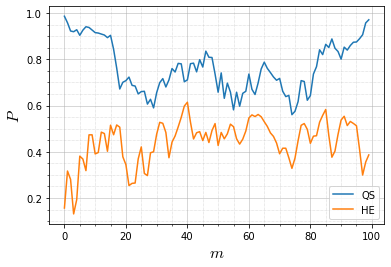

In [69]:
M = 100
N = 2
Weights = pd.read_csv("../Data/Leakage/XX/Weights/Qubit_CNOT_XX_M100_leakage10_g1.0_maxT1.0_maxD20_Weights/Qubit_CNOT_XX_M100_leakage10_g1.0_maxT1.0_maxD20_Wt1.0.csv",names=["X1","X2","Y1","Y2"])
R = Weights.to_numpy()
level = 3
maxDStr = 20
tmin = pi/4
eStateOccup(M,N,level,maxDStr,tmin,R,10)
saveFig("0801","QBL_Rev")

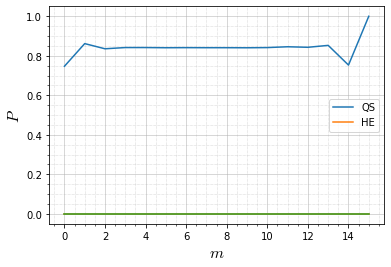

In [70]:
M = 16
N = 2
Weights = pd.read_csv("../Data/Leakage/XX/Weights/Qutrit_CNOT_XX_M16_leakage5_g1.0_maxT1.0_maxD20_Weights/Qutrit_CNOT_XX_M16_leakage5_g1.0_maxT1.0_maxD20_Wt1.0.csv",names=["X1","X2","Y1","Y2","LX1","LX2","LY1","LY2"])
R = Weights.to_numpy()
level = 4
maxDStr = 20
tmin = pi/4
aVal = 5
eStateOccup(M,N,level,maxDStr,tmin,R,5)

## Development of Energy State Subspaces

In [74]:
maxLevel = 2
psi = 1/2*concatenate((array([1,1]),array((maxLevel-1)*[0]),array([1,1])))
psiTemp = zeros((maxLevel + 1) ** 2)
psiTemp[:len(psi)] = psi
psi = psiTemp
print(psi)
for i in range(maxLevel+1):
    for j in range(maxLevel+1):
        print("|" + str(i) + str(j) + ">: " + str(psi[(maxLevel+1)*i + j]))
print(psi)

[0.5 0.5 0.  0.5 0.5 0.  0.  0.  0. ]
|00>: 0.5
|01>: 0.5
|02>: 0.0
|10>: 0.5
|11>: 0.5
|12>: 0.0
|20>: 0.0
|21>: 0.0
|22>: 0.0
[0.5 0.5 0.  0.5 0.5 0.  0.  0.  0. ]


In [10]:
psi.T @ psi

1.0

Here we see that we have made a vector $|\psi\rangle$ that is an equal superposition of all states in the qubit subspace. Now by evaluating a unitary $U$'s expectation value with $\psi$, we can calculation the probability that neither qudit is occupying a higher energy state. Above we see for the identity operator that the system is still in the qubit subspace. 

Now lets' development a function to look at states that correspond to higher energy states. 

In [11]:
level = 3
maxLevel = 4
psi2 = zeros((maxLevel ** 2))
for i in range(maxLevel**2): 
    if i % level == 2:
        psi2[i] = 1
    if i > (level - 1) ** 2 + 1 and i < (level - 1) ** 2 + maxLevel+1:
        psi2[i]= 1
for i in range(maxLevel):
    for j in range(maxLevel):
        print("|" + str(i) + str(j) + ">: " + str(psi2[maxLevel*i + j]))

|00>: 0.0
|01>: 0.0
|02>: 1.0
|03>: 0.0
|10>: 0.0
|11>: 1.0
|12>: 1.0
|13>: 1.0
|20>: 1.0
|21>: 0.0
|22>: 0.0
|23>: 1.0
|30>: 0.0
|31>: 0.0
|32>: 1.0
|33>: 0.0


In [12]:
maxLevel = 4
eLevel = 0
psi = ones(maxLevel+1)
psi[eLevel] = 2
psi = kron(psi,psi)
psi = (psi != 1).astype(int)
print("Printing states occupied by energy level: " + str(eLevel))
print(str(maxLevel) + " qudit system.")
psi = psi/sqrt(sum(psi))
for i in range(maxLevel+1):
    for j in range(maxLevel+1):
        print("|" + str(i) + str(j) + ">: " + str(psi[(maxLevel+1)*i + j]))

Printing states occupied by energy level: 0
4 qudit system.
|00>: 0.3333333333333333
|01>: 0.3333333333333333
|02>: 0.3333333333333333
|03>: 0.3333333333333333
|04>: 0.3333333333333333
|10>: 0.3333333333333333
|11>: 0.0
|12>: 0.0
|13>: 0.0
|14>: 0.0
|20>: 0.3333333333333333
|21>: 0.0
|22>: 0.0
|23>: 0.0
|24>: 0.0
|30>: 0.3333333333333333
|31>: 0.0
|32>: 0.0
|33>: 0.0
|34>: 0.0
|40>: 0.3333333333333333
|41>: 0.0
|42>: 0.0
|43>: 0.0
|44>: 0.0


In [13]:
def stateProj(eLevel,maxLevel,output=False):
    psi = ones(maxLevel+1)
    psi[eLevel] = 2
    psi = kron(psi,psi)
    psi = (psi != 1).astype(int)
    for i in range(len(psi)): # This is to ensure no population of higher energy states
        if i > eLevel*(maxLevel+1) + eLevel: psi[i] = 0
    psi = psi/sqrt(sum(psi))
    if output == True:
        for i in range(maxLevel+1):
            for j in range(maxLevel+1):
                print("|" + str(i) + str(j) + ">: " + str(psi[(maxLevel+1)*i + j]))
    return psi

In [59]:
stateProj(2,2,True)

|00>: 0.0
|01>: 0.0
|02>: 0.4472135954999579
|10>: 0.0
|11>: 0.0
|12>: 0.4472135954999579
|20>: 0.4472135954999579
|21>: 0.4472135954999579
|22>: 0.4472135954999579


array([0.       , 0.       , 0.4472136, 0.       , 0.       , 0.4472136,
       0.4472136, 0.4472136, 0.4472136])

In [14]:
stateProj(2,4) + stateProj(3,4)

array([0.        , 0.        , 0.4472136 , 0.37796447, 0.        ,
       0.        , 0.        , 0.4472136 , 0.37796447, 0.        ,
       0.4472136 , 0.4472136 , 0.4472136 , 0.37796447, 0.        ,
       0.37796447, 0.37796447, 0.37796447, 0.37796447, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [15]:
maxLevel = 3
eLevel = 2
psi = ones(maxLevel+1)
psi[eLevel] = 2
psi = kron(psi,psi)
psi = (psi != 1).astype(int)
for i in range(len(psi)):
    if i > eLevel*(maxLevel+1) + eLevel: psi[i] = 0
#psi = psi/sqrt(sum(psi))
psi2 = ones(maxLevel+1)
psi2[eLevel + 1] = 2
psi2 = kron(psi2,psi2)
psi2 = (psi2 != 1).astype(int)
for i in range(maxLevel+1):
    for j in range(maxLevel+1):
        print("|" + str(i) + str(j) + ">: " + str(psi[(maxLevel+1)*i + j]),end = " ")
        print("|" + str(i) + str(j) + ">: " + str(psi2[(maxLevel+1)*i + j]))

|00>: 0 |00>: 0
|01>: 0 |01>: 0
|02>: 1 |02>: 0
|03>: 0 |03>: 1
|10>: 0 |10>: 0
|11>: 0 |11>: 0
|12>: 1 |12>: 0
|13>: 0 |13>: 1
|20>: 1 |20>: 0
|21>: 1 |21>: 0
|22>: 1 |22>: 0
|23>: 0 |23>: 1
|30>: 0 |30>: 1
|31>: 0 |31>: 1
|32>: 0 |32>: 1
|33>: 0 |33>: 1


In [16]:
psi3 = psi ^ psi2
for i in range(maxLevel+1):
    for j in range(maxLevel+1):
        print("|" + str(i) + str(j) + ">: " + str(psi3[(maxLevel+1)*i + j]))

|00>: 0
|01>: 0
|02>: 1
|03>: 1
|10>: 0
|11>: 0
|12>: 1
|13>: 1
|20>: 1
|21>: 1
|22>: 1
|23>: 1
|30>: 1
|31>: 1
|32>: 1
|33>: 1


## Development of multi-level helper functions

In [17]:
from numpy import zeros
def genDrive(d, dTrans,type):
    if d < 2:
        raise Exception("The energy levels of our system must be greater than 2. Your input has " + str(d) + " energy levels.")
    if dTrans == 0 or dTrans > d - 1:
        raise Exception("The X gate must be between energy levels withn our system. Right now your transition is in between |" + str(dTrans-1)  + "> -> |" + str(dTrans) + ">.\n Number of energy levels is " + str(d) + ".")
    type = type.lower()
    if type != "x" and type != "y" and type != "tpx" and type != "tpy":
        raise Exception("The drive must be an X, Y, or two Phonon transition (input X, Y, TPX, or TPY).")

    cIndex = 1
    if type[:2] == "tp": 
        cIndex = 2
        type = type[2:] 

    drive = zeros((d,d),dtype=complex)
    val = 0
    if type == "x": val = 1
    else: val = -1j
    drive[dTrans-cIndex,dTrans] = val
    return drive + drive.conj().T

In [18]:
level = 4
drives = []
for l in range(1,level):
    drives.append(genDrive(level,l,"x"))
    drives.append(genDrive(level,l,"y"))
for d in drives: print(d,end="\n\n")

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

[[0.+0.j 0.-1.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]]



In [19]:
level = 4
drives = []
for l in range(1,level):
    if l == 1:
        drives.append(genDrive(level,l,"x"))
        drives.append(genDrive(level,l,"y"))
    else:
        drives.append(genDrive(level,l,"tpx"))
        drives.append(genDrive(level,l,"tpy"))
for d in drives: print(d,end="\n\n")

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

[[0.+0.j 0.-1.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

[[0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]

[[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]]



In [20]:
level = 3
genDrive(level,level-1,"x")

array([[0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j]])

In [21]:
from numpy import array
level = 5
anharmVal = 3
anharmVals = anharmVal*array([i+1 for i in range(level-2)])
#print(anharmVals)
anharm = zeros((level,level))
for l in range(2,level):
    anharm[-1*(l-1),-1*(l-1)] = anharmVals[::-1][l-2]
print(anharm)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 6. 0.]
 [0. 0. 0. 0. 9.]]


In [22]:
def gateGen(gateType,l):
    gateType = gateType.upper()
    G = zeros((l ** 2, l ** 2))
    if l < 2: raise Exception("System must have 2 or more energy levels.")
    if gateType == "CNOT":
        for i in range(l ** 2):
            if i == l: G[i,i+1] = 1
            elif i == l+1: G[i,i-1] = 1
            else: G[i,i] = 1
        return G
    else:
        raise Exception("Gate type not implemented.")

In [23]:
gateGen("CNOT",4)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [24]:
sx = genDrive(4,1,"x")
H0 = kron(sx,sx)
for l in H0: 
    for v in l: print(np.real(v),end=", ")
    print()

0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [25]:
level = 2
np.diag(level*[1])

array([[1, 0],
       [0, 1]])

In [26]:
level = 4
np.diag(np.concatenate((array([1,-1]),array((level-2)*[0]))))

array([[ 1,  0,  0,  0],
       [ 0, -1,  0,  0],
       [ 0,  0,  0,  0],
       [ 0,  0,  0,  0]])